# Machine Learning from Disaster

## Title : Case Study Titanic

## Author(s) : FOUTSE

##  Date : 30/12/2016


# LIBRARIES LOADING 

In [1]:
import pandas as pd
import numpy as np
import csv as csv
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
% matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import svm

# Files loading

In [2]:
train = pd.read_csv('/home/foutse/Downloads/TITANIC_Project/train.csv', header=0)
test  = pd.read_csv('/home/foutse/Downloads/TITANIC_Project/test.csv', header= 0)

## We drop the colunm which is not of interest to us

In [3]:
train=train.drop("Ticket", axis=1)   
test=test.drop("Ticket",axis=1)            
test.head()
train.head(10)                                       #train.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C


In [4]:
train.info() #checking information of the data, we observe there are missing values for Age, Cabin and Embarked, since they are less than 891

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


## We fill the missing values

In [5]:
train["Age"]= train["Age"].fillna(0) #complete the missing values for train data
train["Cabin"]= train["Cabin"].fillna("NA")
train["Embarked"]= train["Embarked"].fillna("NA")

#complete the missing values for test
test["Age"]= test["Age"].fillna(0)
test["Cabin"]= test["Cabin"].fillna("NA")
test["Embarked"]= test["Embarked"].fillna("NA")

In [6]:
train.info() #checking if well replaced
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          418 non-null object
Embarked       418 non-null obje

In [7]:
train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NA,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NA,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NA,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,8.4583,NA,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NA,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NA,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NA,C


# DATA VISUALIZATION

#  visuallisation of passenger class

In [8]:
# we find the indexes of survivers and death. In order to visuallise the data in these two categories
index_S= train["Survived"]==1
index_D = np.logical_not(index_S)

In [9]:
index_S.head()
index_D.head()

0     True
1    False
2    False
3    False
4     True
Name: Survived, dtype: bool

In [10]:
Pclass_S= train[index_S].Pclass
train_S= train[index_S]
Pclass_D= train[index_D].Pclass
train_D= train[index_D]


In [11]:
train_S.head()
train_D.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NA,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NA,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,8.4583,NA,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NA,S


In [12]:
Pclass_Ssorted=Pclass_S.value_counts().sort_index()
Pclass_Ssorted

1    136
2     87
3    119
Name: Pclass, dtype: int64

In [13]:
Pclass_Dsorted=Pclass_D.value_counts().sort_index()
Pclass_Dsorted

1     80
2     97
3    372
Name: Pclass, dtype: int64

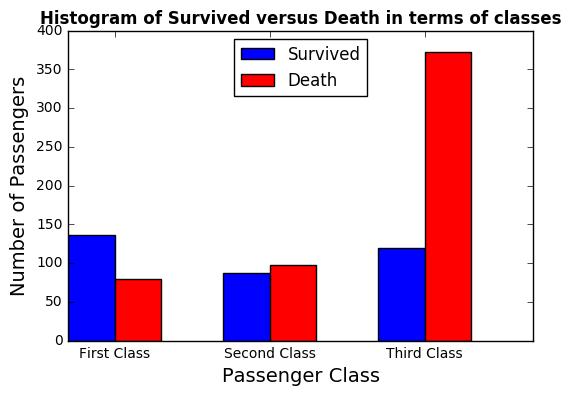

In [14]:
index=np.arange(1,4)
Pclass_Map={1: "First Class", 2: "Second Class", 3: "Third Class"} # creating our dictionary
plot_S= plt.bar(index,Pclass_Ssorted,width=0.3,color="blue",label="Survived")
plot_D= plt.bar(index+0.3,Pclass_Dsorted,width=0.3,color="red",label="Death") 
plt.legend(loc="upper center")
plt.xticks(index+0.3,(Pclass_Map[l] for l in index))
plt.xlabel("Passenger Class",fontsize=14)
plt.ylabel("Number of Passengers",fontsize=14)
plt.title("Histogram of Survived versus Death in terms of classes",fontweight="bold")
plt.show()

# Comments:
We can see that the highest number of deaths are does who where in the third class, the ratio of deaths is greater over those who survived. In the Second class, we observer that the number of survived and deaths are almost same. For those in the First class, those who survived where more than those who died. 

## SEX VISUALIZATION

In [15]:
Sex_S= train[index_S].Sex
train_S= train[index_S]
Sex_D= train[index_D].Sex
train_D= train[index_D]

In [16]:
Sex_Ssorted=Sex_S.value_counts().sort_index()
Sex_Ssorted

female    233
male      109
Name: Sex, dtype: int64

In [17]:
Sex_Dsorted=Sex_D.value_counts().sort_index()
Sex_Dsorted

female     81
male      468
Name: Sex, dtype: int64

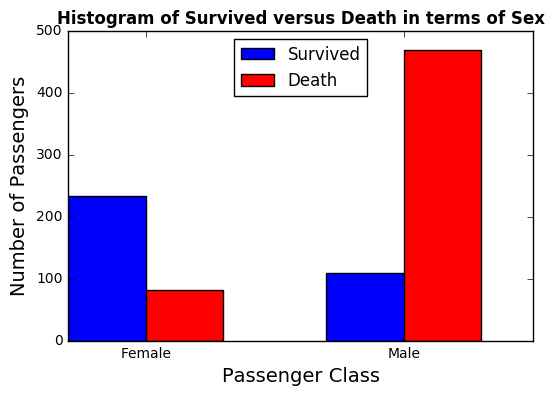

In [18]:
index=np.arange(2)
Sex_Map={0: "Female", 1: "Male"}
plot_S= plt.bar(index,Sex_Ssorted,width=0.3,color="blue",label="Survived")
plot_D= plt.bar(index+0.3,Sex_Dsorted,width=0.3,color="red",label="Death") 
plt.legend(loc="upper center")
plt.xticks(index+0.3,(Sex_Map[l] for l in index))
plt.xlabel("Passenger Class",fontsize=14)
plt.ylabel("Number of Passengers",fontsize=14)
plt.title("Histogram of Survived versus Death in terms of Sex",fontweight="bold")
plt.show()

# COMMENTS

We can see from the histogram that the propotion of females who survived was far greater than the proportion of male whos survide. One could say all the men where gentle as the movie by Lionardo Dicaprio showed to us.
We this number of females, lets us do some further investigation on the data.

# Further investigations

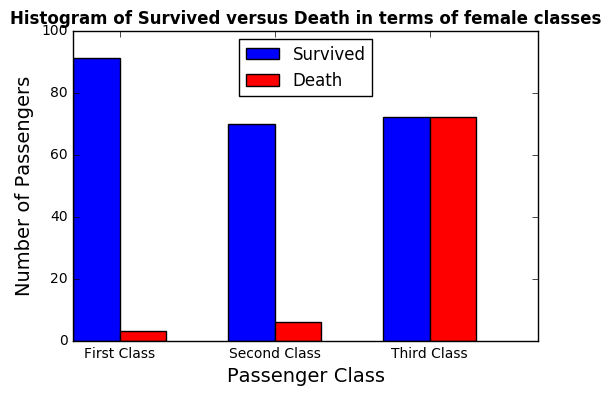

In [19]:
index_female=train["Sex"]=="female"
train_female= train.loc[index_female]
# index_S
# index_D
Index_femaleS=train_female["Survived"]==1
Index_femaleD=train_female["Survived"]==0

Pclass_FS= train_female[Index_femaleS].Pclass
Pclass_FD= train_female[Index_femaleD].Pclass

Pclass_FSsorted=Pclass_FS.value_counts().sort_index()
Pclass_FDsorted=Pclass_FD.value_counts().sort_index()

index=np.arange(1,4)
Pclass_Map={1: "First Class", 2: "Second Class", 3: "Third Class"}
plot_S= plt.bar(index,Pclass_FSsorted,width=0.3,color="blue",label="Survived")
plot_D= plt.bar(index+0.3,Pclass_FDsorted,width=0.3,color="red",label="Death") 
plt.legend(loc="upper center")
plt.xticks(index+0.3,(Pclass_Map[l] for l in index))
plt.xlabel("Passenger Class",fontsize=14)
plt.ylabel("Number of Passengers",fontsize=14)
plt.title("Histogram of Survived versus Death in terms of female classes",fontweight="bold")
plt.show()

# COMMENTS
We obsever that amongst those who where in the first class, just some few number died, we can say the same in the second class. But in the third class, the number of death and survived was almost the same. This has shown to us again that the first class was privillaged to that incident.

## AGE VISUALISATION

In [20]:
Age_S= train[index_S].Age
train_S= train[index_S]
Age_D= train[index_D].Age
train_D= train[index_D]
age_cat=[]
for Age in train.Age :
        if Age < 10.0 :
            age_cat.append("baby")
        elif Age >= 10.0 and Age < 18.0:
            age_cat.append("Adolecence")
        elif Age >= 18.0 and Age < 60.0:
            age_cat.append("Adult")
        else :
            age_cat.append("Old")

train["AgeCategory"]= pd.Series(age_cat, train.index)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NA,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NA,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NA,S,Adult


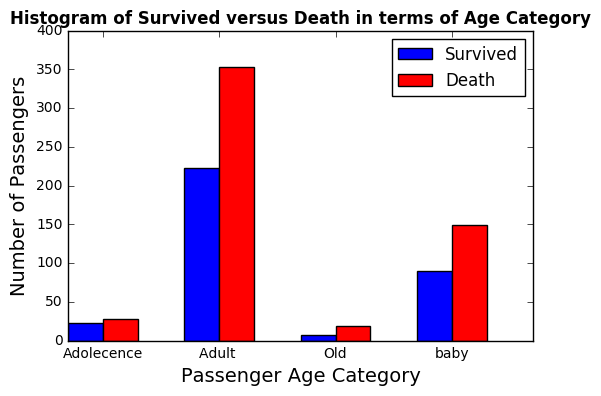

In [21]:
ageCategory_S= train[index_S].AgeCategory
ageCategory_D= train[index_D].AgeCategory
ageCategory_Ssorted=ageCategory_S.value_counts().sort_index()
ageCategory_Dsorted=ageCategory_D.value_counts().sort_index()

index=np.arange(1,5)
ageCategory_Map={1: "Adolecence", 2: "Adult ", 3: "Old", 4 : "baby"}
plot_S= plt.bar(index,ageCategory_Ssorted,width=0.3,color="blue",label="Survived")
plot_D= plt.bar(index+0.3,ageCategory_Dsorted,width=0.3,color="red",label="Death") 
plt.legend(loc="upper right")
plt.xticks(index+0.3,(ageCategory_Map[l] for l in index))
plt.xlabel("Passenger Age Category",fontsize=14)
plt.ylabel("Number of Passengers",fontsize=14)
plt.title("Histogram of Survived versus Death in terms of Age Category",fontweight="bold")
plt.show()


# Comments:
We can see that there more adults and many of them died as well. The babies, aged from 0 to 9 where those whom the propotion of survied is greater than the death. The proportion of Old people who survived was far lesser than the death ones. The proportion of adolecences who died was a little bit more than those who survived.


# An alternative method

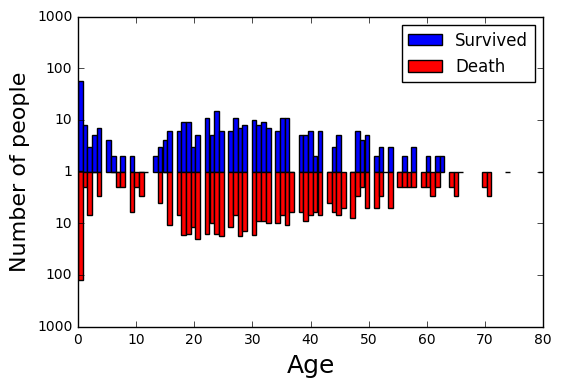

In [22]:
# # Vizualisation of Age
age_survived = train[index_S].Age
age_died = train[index_D].Age

minAge, maxAge = min(train.Age), max(train.Age)
bins = np.linspace(minAge, maxAge, 100)

age_survived_counts, _ = np.histogram(age_survived, bins)
age_died_counts, _ = np.histogram(age_died, bins)

plt.bar(bins[:-1], np.log10(age_survived_counts), color='blue', label='Survived')
plt.bar(bins[:-1], -np.log10(age_died_counts), color="red", label='Death')
plt.yticks(range(-3,4), (10**abs(k) for k in range(-3,4)))
plt.legend(loc='upper right')
plt.xlabel('Age', fontsize=18)
plt.ylabel('Number of people', fontsize=16)
plt.show()

# Siblings Visualisation

In [23]:
Sibsp_S= train[index_S].SibSp
train_S= train[index_S]
Sibsp_D= train[index_D].SibSp
train_D= train[index_D]

Sibsp_Ssorted=Sibsp_S.value_counts().sort_index()
Sibsp_Ssorted
Sibsp_Dsorted=Sibsp_D.value_counts().sort_index()
Sibsp_Dsorted
Sibsp_SortedNew= pd.concat([Sibsp_Ssorted,Sibsp_Dsorted], axis=1).fillna(0)
Sibsp_SortedNew

,SibSp,SibSp
0,210.0,398
1,112.0,97
2,13.0,15
3,4.0,12
4,3.0,15
5,0.0,5
8,0.0,7


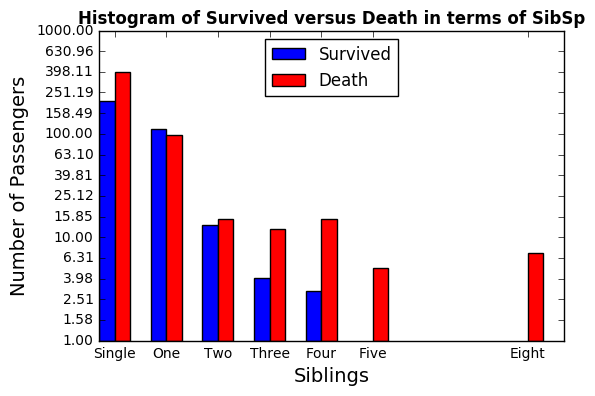

In [24]:
k=np.linspace(0,3,16)
#k= "%.2f" %k
Sibsp_Map={0: "Single", 1: "One", 2: "Two",3: "Three", 4: "Four",5: "Five",8: "Eight"}
plot_S= plt.bar(Sibsp_SortedNew.index.values,np.log10(Sibsp_SortedNew.ix[:,0]),width=0.3,color="blue",label="Survived")
plot_D= plt.bar(Sibsp_SortedNew.index.values+0.3,np.log10(Sibsp_SortedNew.ix[:,1]),width=0.3,color="red",label="Death") 
plt.legend(loc="upper center")
plt.xticks(Sibsp_SortedNew.index.values+0.3,(Sibsp_Map[l] for l in Sibsp_SortedNew.index.values))
plt.yticks(k,("%.2f" %10**l  for l in k))
plt.xlabel("Siblings",fontsize=14)
plt.ylabel("Number of Passengers",fontsize=14)
plt.title("Histogram of Survived versus Death in terms of SibSp",fontweight="bold")
plt.show()

# PARCH Visualisation

In [25]:
Parch_S= train[index_S].Parch
train_S= train[index_S]
Parch_D= train[index_D].Parch
train_D= train[index_D]

Parch_Ssorted=Parch_S.value_counts().sort_index()
Parch_Ssorted
Parch_Dsorted=Parch_D.value_counts().sort_index()
Parch_Dsorted
Parch_SortedNew= pd.concat([Parch_Ssorted,Parch_Dsorted], axis=1).fillna(0)
Parch_SortedNew

,Parch,Parch
0,233.0,445
1,65.0,53
2,40.0,40
3,3.0,2
4,0.0,4
5,1.0,4
6,0.0,1


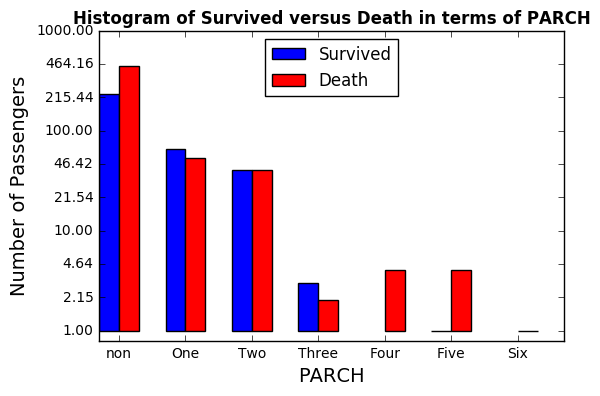

In [26]:
k=np.linspace(0,3,10)
#k= "%.2f" %k
Parch_Map={0: "non", 1: "One", 2: "Two",3: "Three", 4: "Four",5: "Five",6: "Six"}
plot_S= plt.bar(Parch_SortedNew.index.values,np.log10(Parch_SortedNew.ix[:,0]),width=0.3,color="blue",label="Survived")
plot_D= plt.bar(Parch_SortedNew.index.values+0.3,np.log10(Parch_SortedNew.ix[:,1]),width=0.3,color="red",label="Death") 
plt.legend(loc="upper center")
plt.xticks(Parch_SortedNew.index.values+0.3,(Parch_Map[l] for l in Parch_SortedNew.index.values))
plt.yticks(k,("%.2f" %10**l for l in k))
plt.ylim([-0.1,3])
plt.xlabel("PARCH",fontsize=14)
plt.ylabel("Number of Passengers",fontsize=14)
plt.title("Histogram of Survived versus Death in terms of PARCH",fontweight="bold")
plt.show()

# Comments:
We can see that the people with Parch number equals 1, that is those Either with thier parents or thier children survied more than the number who died. Those who had thier two parents or had maybe two children, the number of death and survived was equal. Those with 3 Parch, survived more than they died. Those who where single, majority died. But those with four and five parch all died together. The only Parch with 6 survived.

# We prepare our data for Machine learning analysis

## Data Normalisation

We start with the Age

In [27]:
#minAge, maxAge = min(train.Age), max(train.Age)
train["Age"]/=maxAge
test["Age"]/=maxAge

maxSibSp = max(train.SibSp)
train["SibSp"]/=maxSibSp
test["SibSp"]/=maxSibSp

maxFare = max(train.Fare)
train["Fare"]/=maxFare
test["Fare"]/=maxFare



# Transformation of Categoric data to numeric data

In [28]:
# For Sex
train["Male"]=train["Sex"]
train["Male"].loc[train["Male"]=="male"]=1.0
train["Male"].loc[train["Male"]=="female"]=0.0

train["Female"]=train["Sex"]
train["Female"].loc[train["Female"]=="female"]=1.0
train["Female"].loc[train["Female"]=="male"]=0.0

#Cabin= train.Cabin

 

train["Cabin"]=train["Cabin"].replace('[0-9]+','',regex=True)
Cabin_sorted=train.Cabin.value_counts().sort_index()
Cabin_sorted

for ind_cabin in Cabin_sorted.index.values:
    train["Cabin_%s" %ind_cabin]=train["Cabin"]   #creating new columns for each cabin type.
    train["Cabin_%s" %ind_cabin].loc[train["Cabin"]==ind_cabin]=1.0
    train["Cabin_%s" %ind_cabin].loc[train["Cabin"]!= ind_cabin]=0.0
Cabin_sorted.index.values

# for Embarked
Embarked_sorted=train.Embarked.value_counts().sort_index()
Embarked_sorted
for ind_Emb in Embarked_sorted.index.values:
    train["Embarked_%s" %ind_Emb]=train["Embarked"]   #creating new columns for each Embarked type.
    train["Embarked_%s" %ind_Emb].loc[train["Embarked"]==ind_Emb]=1.0
    train["Embarked_%s" %ind_Emb].loc[train["Embarked"]!= ind_Emb]=0.0
Embarked_sorted.index.values

# for Pclass
Pclass_sorted=train.Pclass.value_counts().sort_index()
Pclass_sorted
for ind_Pclass in Pclass_sorted.index.values:
    train["Pclass_%s" %ind_Pclass]=train["Pclass"]   #creating new columns for each Embarked type.
    train["Pclass_%s" %ind_Pclass].loc[train["Pclass"]==ind_Pclass]=1.0
    train["Pclass_%s" %ind_Pclass].loc[train["Pclass"]!= ind_Pclass]=0.0
Pclass_sorted.index.values


/home/foutse/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


array([1, 2, 3])

# We repeat the same on test data

In [29]:

# For Sex
test["Male"]=test["Sex"]
test["Male"].loc[test["Male"]=="male"]=1.0
test["Male"].loc[test["Male"]=="female"]=0.0

test["Female"]=test["Sex"]
test["Female"].loc[test["Female"]=="female"]=1.0
test["Female"].loc[test["Female"]=="male"]=0.0

#Cabin= train.Cabin

len(Cabin_sorted)
 

test["Cabin"]=test["Cabin"].replace('[0-9]+','',regex=True)
Cabin_sorted=test.Cabin.value_counts().sort_index()
Cabin_sorted

for ind_cabin in Cabin_sorted.index.values:
    test["Cabin_%s" %ind_cabin]=test["Cabin"]   #creating new columns for each cabin type.
    test["Cabin_%s" %ind_cabin].loc[test["Cabin"]==ind_cabin]=1.0
    test["Cabin_%s" %ind_cabin].loc[test["Cabin"]!= ind_cabin]=0.0
Cabin_sorted.index.values

# for Embarked
Embarked_sorted=test.Embarked.value_counts().sort_index()
Embarked_sorted
for ind_Emb in Embarked_sorted.index.values:
    test["Embarked_%s" %ind_Emb]=test["Embarked"]   #creating new columns for each Embarked type.
    test["Embarked_%s" %ind_Emb].loc[test["Embarked"]==ind_Emb]=1.0
    test["Embarked_%s" %ind_Emb].loc[test["Embarked"]!= ind_Emb]=0.0
Embarked_sorted.index.values

# for Pclass
Pclass_sorted=test.Pclass.value_counts().sort_index()
Pclass_sorted
for ind_Pclass in Pclass_sorted.index.values:
    test["Pclass_%s" %ind_Pclass]=test["Pclass"]   #creating new columns for each Embarked type.
    test["Pclass_%s" %ind_Pclass].loc[test["Pclass"]==ind_Pclass]=1.0
    test["Pclass_%s" %ind_Pclass].loc[test["Pclass"]!= ind_Pclass]=0.0
Pclass_sorted.index.values

array([1, 2, 3])

### We now drop unneccessary columns

In [30]:
train=train.drop(["Pclass","Sex","Parch","Cabin","Embarked","Name", "AgeCategory"], axis=1)
train.head()
test=test.drop(["Pclass","Sex","Parch","Cabin","Embarked","Name"], axis=1)
test.head()

,PassengerId,Age,SibSp,Fare,Male,Female,Cabin_A,Cabin_B,Cabin_B B,Cabin_B B B,...,Cabin_F E,Cabin_F G,Cabin_G,Cabin_NA,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,0.43125,0.000,0.015282,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0.0,0.0,1.0
1,893,0.58750,0.125,0.013663,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0.0,0.0,1.0
2,894,0.77500,0.000,0.018909,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0.0,1.0,0.0
3,895,0.33750,0.000,0.016908,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0.0,0.0,1.0
4,896,0.27500,0.125,0.023984,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0.0,0.0,1.0


## We separate the targate, i.e the column survived from the variables in the train data

In [31]:
Y_train=train.Survived
X_train= train.drop(["Survived"], axis=1)
Y_train.head()
#X_train.astype(float)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
test["Fare"] = test.Fare.fillna(0)
alldata = pd.concat([X_train,test],axis=0)
alldata = alldata.fillna(0)
trainNew = alldata.iloc[:891]
testNew=alldata.iloc[891:]
trainNew=trainNew.drop(["PassengerId"], axis=1)
testNew=testNew.drop(["PassengerId"],axis=1)

In [34]:

Y_train=Y_train.values   #we transform the data from dataframe to an array or matrix
X_train=trainNew.values
X_test=testNew.values

# Machine learning Begins

## Random Forest

In [35]:
RF= RandomForestClassifier()
#RF.fit(X_train, Y_train)

In [36]:
Parameter_estimator=[10,50,100,200]
Parameter_criterion=["gini","entropy"]
Parameter_maxdepth= [10,20]
cv=StratifiedKFold(10)

In [37]:
GSCV=GridSearchCV(estimator=RF, param_grid=dict(n_estimators=Parameter_estimator,criterion=Parameter_criterion, 
                                                max_depth=Parameter_maxdepth),cv=list(cv.split(X_train,Y_train)))

In [38]:
GSCV.fit(X_train, Y_train)

GridSearchCV(cv=[(array([ 82,  84, ..., 889, 890]), array([ 0,  1, ..., 92, 93])), (array([  0,   1, ..., 889, 890]), array([ 82,  84, ..., 198, 204])), (array([  0,   1, ..., 889, 890]), array([168, 169, ..., 288, 289])), (array([  0,   1, ..., 889, 890]), array([251, 252, ..., 356, 357])), (array([  0,   1, .....y([707, 708, ..., 805, 806])), (array([  0,   1, ..., 805, 806]), array([801, 802, ..., 889, 890]))],
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 20]}

In [39]:
GSCV.best_score_

0.81705948372615034

In [40]:
Y_predict=GSCV.predict(X_test)
Y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [41]:
submit_GSCV =  pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": Y_predict})
file_name = 'new_Test_predictions_rf_%g_%s.csv' % (GSCV.best_estimator_.n_estimators, GSCV.best_estimator_.criterion)
submit_GSCV .to_csv(file_name, index=False)

# Comments:
Here We have a very high value for the best score, so our prediction is good. But we cannot limite ourself on this method, there exist more better methods for this kind of analysis, so we exploit another method to make sure we do a good prediction. 

# The SVC Method

In [42]:
SVC= svm.SVC()

Parameter_c=np.power(2, np.arange(8.0,14.0))
Parameter_kernel=['rbf']
#Parameter_degree=[2,3]
Parameter_gamma= np.power(2, np.arange(-7.0,-2.0))
cv=StratifiedKFold(10)

In [43]:
GSCV_svc=GridSearchCV(estimator=SVC, param_grid=dict(C=Parameter_c,kernel=Parameter_kernel, gamma=Parameter_gamma),
                  cv=list(cv.split(X_train,Y_train)))

In [44]:
GSCV_svc.fit(X_train, Y_train)

GridSearchCV(cv=[(array([ 82,  84, ..., 889, 890]), array([ 0,  1, ..., 92, 93])), (array([  0,   1, ..., 889, 890]), array([ 82,  84, ..., 198, 204])), (array([  0,   1, ..., 889, 890]), array([168, 169, ..., 288, 289])), (array([  0,   1, ..., 889, 890]), array([251, 252, ..., 356, 357])), (array([  0,   1, .....y([707, 708, ..., 805, 806])), (array([  0,   1, ..., 805, 806]), array([801, 802, ..., 889, 890]))],
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': array([  256.,   512.,  1024.,  2048.,  4096.,  8192.]), 'gamma': array([ 0.00781,  0.01562,  0.03125,  0.0625 ,  0.125  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [45]:
Y_predict_svc=GSCV_svc.predict(X_test)

In [46]:
GSCV_svc.best_params_

{'C': 512.0, 'gamma': 0.03125, 'kernel': 'rbf'}

In [47]:
GSCV_svc.best_score_

0.81144781144781142

In [48]:
Y_predict_svc

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [49]:
submit_GSCV_svc =  pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": Y_predict_svc})
file_name = 'new_Test_predictions_svc_svm_%g_%s.csv' % (GSCV_svc.best_estimator_.C, 
                                                   GSCV_svc.best_estimator_.gamma)
submit_GSCV_svc .to_csv(file_name, index=False)

# Comments:
This is the best method for this kind of prediction, and we also have a good score value, so we can conclude that this is a good prediction. Yet still some other methods like nearest neighborhood exist which could also be used, but we will end with this method. We consider the prediction of the method with Random forest, since we have the greates score value.

# END OF PROGRAM